In [15]:
# 11_metric_distribution_explorer.ipynb
# 📊 Distribution Explorer for Advanced Metrics

# 🛠 Requirements:
# - pandas, seaborn, matplotlib

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

DATA_DIR = "./data"

plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = [15,8]

In [16]:
# 📂 Load 2023 advanced season stats

stats_path = os.path.join(DATA_DIR, "advanced_season_stats", "2023.csv")
stats = pd.read_csv(stats_path)

# Filter to FBS teams
teams = stats[stats["conference"].notnull()].copy()

print(f"{len(teams)} FBS teams loaded")

134 FBS teams loaded


In [17]:
# 🎯 Pick metric to explore (must be numeric) and team to highlight
# Examples: offense_ppa, defense_successRate, offense_explosiveness

metric = "defense_ppa"
team_to_highlight = "Michigan"

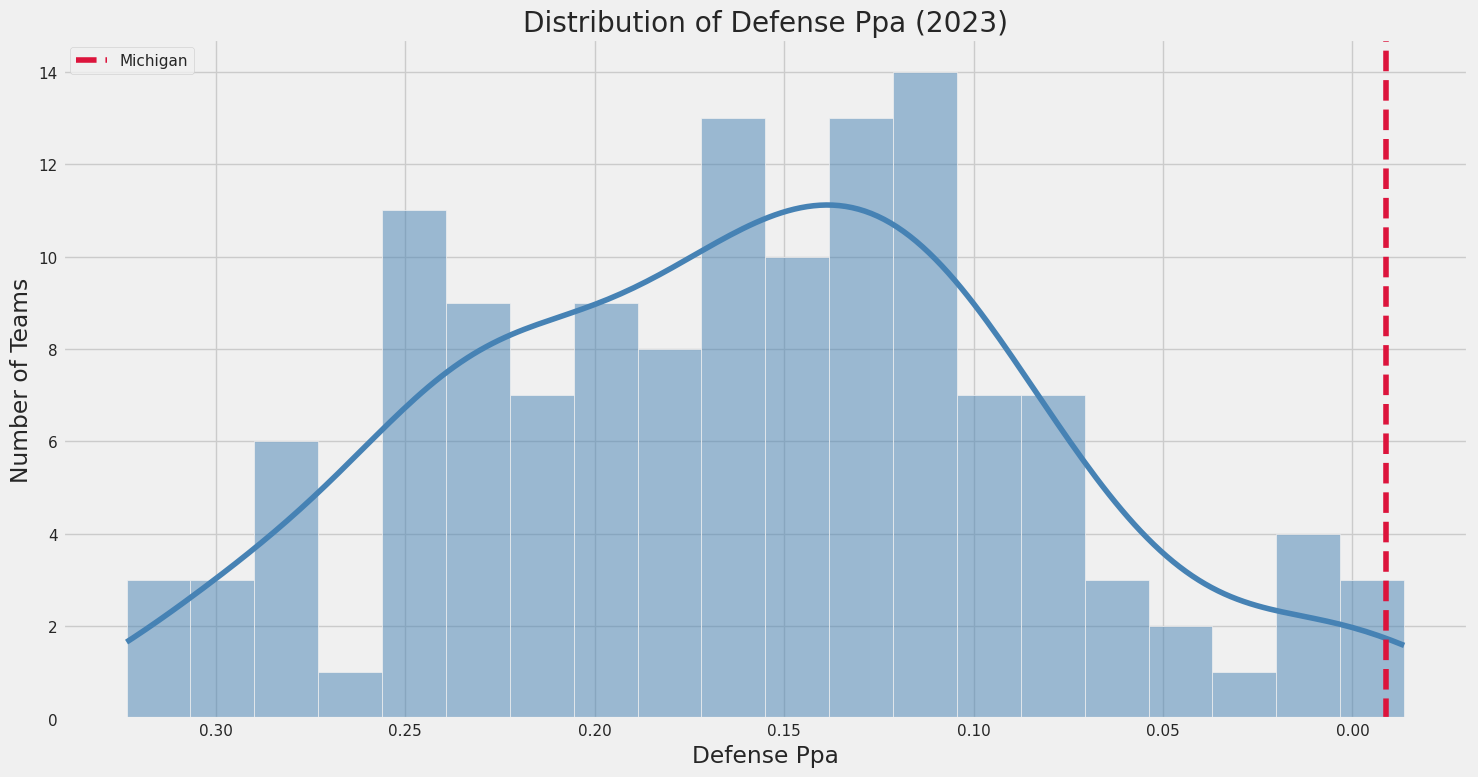

In [18]:
ax = sns.histplot(data=teams, x=metric, bins=20, kde=True, color="steelblue")
plt.title(f"Distribution of {metric.replace('_', ' ').title()} (2023)")
plt.xlabel(metric.replace("_", " ").title())
plt.ylabel("Number of Teams")
ax.invert_xaxis()  # Invert x-axis for better readability

# Highlight selected team
highlight_val = teams.loc[teams["team"] == team_to_highlight, metric].values
if len(highlight_val) > 0:
    plt.axvline(highlight_val[0], color="crimson", linestyle="--", label=f"{team_to_highlight}")
    plt.legend()
else:
    print("Team not found.")

plt.tight_layout()
plt.show()

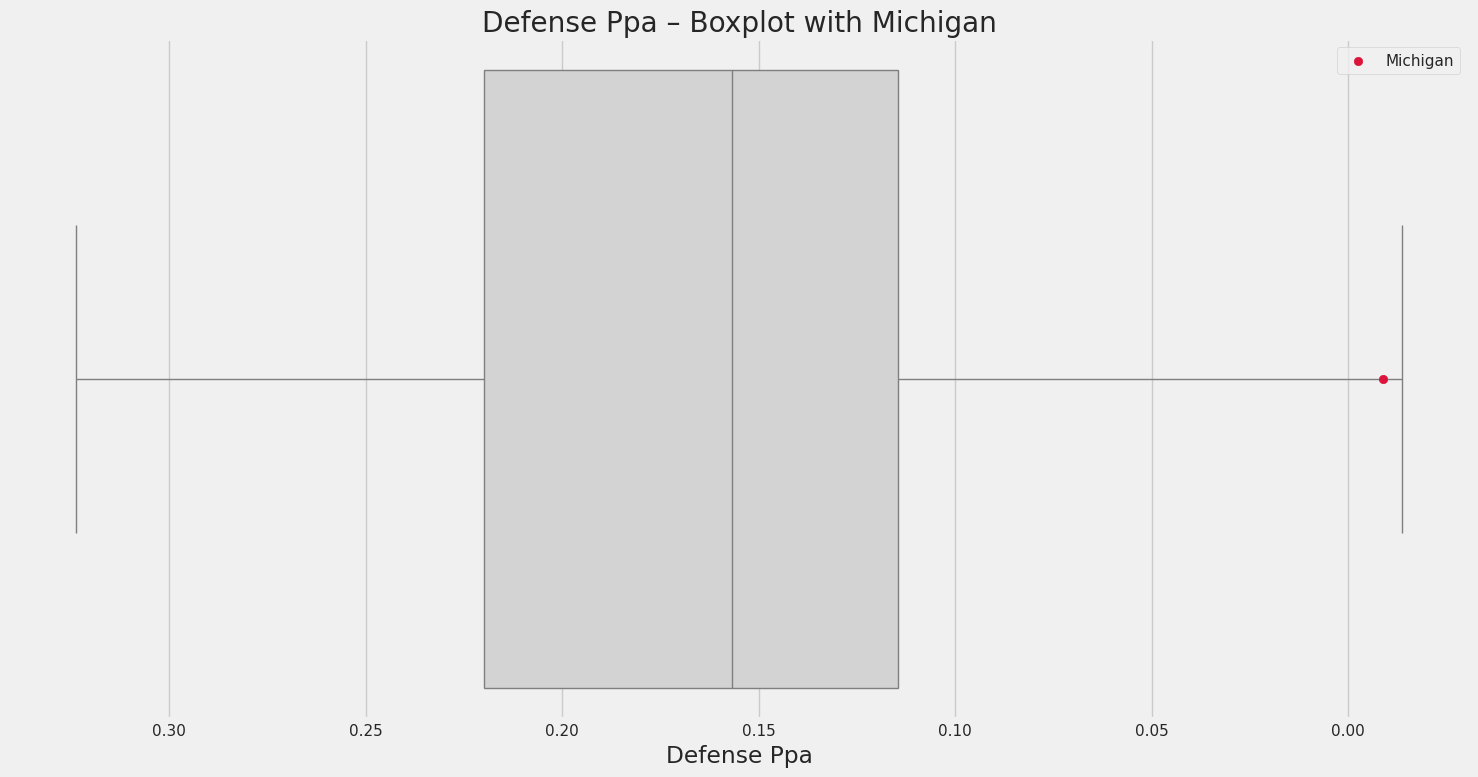

In [19]:
ax = sns.boxplot(data=teams, x=metric, color="lightgray")
plt.scatter(
    x=teams.loc[teams["team"] == team_to_highlight, metric],
    y=[0],
    color="crimson",
    label=team_to_highlight,
    zorder=10
)
ax.invert_xaxis()  # Invert x-axis for better readability
plt.title(f"{metric.replace('_', ' ').title()} – Boxplot with {team_to_highlight}")
plt.xlabel(metric.replace("_", " ").title())
plt.yticks([])
plt.tight_layout()
plt.legend()
plt.show()

In [20]:
highlight = teams[teams["team"] == team_to_highlight].copy()
value = highlight[metric].values[0]
# invert the percentile calculation if lower numbers are better
percentile = (teams[metric] > value).mean() * 100
# use this percentile calculation when higher numbers are better
# percentile = (teams[metric] < value).mean() * 100

print(f"{team_to_highlight}'s {metric}: {value:.3f} ({percentile:.1f}th percentile)")

Michigan's defense_ppa: -0.009 (98.5th percentile)


In [22]:
# ✅ Summary

# In this notebook, you:
# - Selected any numeric metric from the advanced stats
# - Visualized the distribution across FBS teams
# - Highlighted a specific team in the context of the field
# - Estimated percentile standing

# 🧪 Try This:
# - Explore defensive metrics, explosiveness, or tempo
# - Create a dashboard of multiple distributions
# - Use percentiles as input features in your models